In [57]:
pip install comet_ml -q

     |████████████████████████████████| 441 kB 27.3 MB/s 
     |████████████████████████████████| 168 kB 67.3 MB/s 
     |████████████████████████████████| 498 kB 71.1 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 130 kB 68.0 MB/s 
     |████████████████████████████████| 140 kB 74.6 MB/s 
     |████████████████████████████████| 127 kB 62.3 MB/s 
     |████████████████████████████████| 166 kB 66.3 MB/s 
     |████████████████████████████████| 166 kB 74.3 MB/s 
     |████████████████████████████████| 162 kB 80.0 MB/s 
     |████████████████████████████████| 162 kB 71.6 MB/s 
     |████████████████████████████████| 158 kB 69.4 MB/s 
     |████████████████████████████████| 157 kB 75.4 MB/s 
     |████████████████████████████████| 157 kB 49.7 MB/s 
     |████████████████████████████████| 157 kB 74.0 MB/s 
     |████████████████████████████████| 157 kB 74.1 MB/s 
     |████████████

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
import sys
print(sys.version)

3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]


In [ ]:
from dotenv import load_dotenv
load_dotenv();

In [56]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key=os.environ.get('COMET_API_KEY'),
    project_name="ml-models",
    workspace="mmd6020-projet-pratique",
)

# Data Exploration

In [3]:
# source of dataset: https://ieee-dataport.org/open-access/preprocessed-chb-mit-scalp-eeg-database
data_df = pd.read_csv('/content/drive/MyDrive/chbmit_preprocessed_data.csv')

In [4]:
data_df.head()

,# FP1-F7,C3-P3,C4-P4,CZ-PZ,F3-C3,F4-C4,F7-T7,F8-T8,FP1-F3,FP2-F4,...,P3-O1,P4-O2,P7-O1,P7-T7,P8-O2,T7-FT9,T7-P7,T8-P8-0,T8-P8-1,Outcome
0,0.000020,0.000010,0.000022,0.000037,0.000032,0.000035,0.000016,0.000046,-0.000007,0.000043,...,0.000024,-0.000030,0.000010,-0.000011,-0.000037,0.000008,0.000012,0.000021,0.000021,0.0
1,0.000022,0.000008,0.000021,0.000039,0.000030,0.000032,0.000015,0.000039,-0.000006,0.000042,...,0.000026,-0.000017,0.000012,-0.000008,-0.000029,0.000010,0.000009,0.000023,0.000023,0.0
2,0.000021,0.000012,0.000021,0.000040,0.000025,0.000030,0.000013,0.000036,-0.000006,0.000040,...,0.000027,-0.000018,0.000014,-0.000009,-0.000034,0.000012,0.000009,0.000027,0.000027,0.0
3,0.000019,0.000012,0.000021,0.000039,0.000023,0.000028,0.000013,0.000035,-0.000008,0.000036,...,0.000030,-0.000024,0.000015,-0.000009,-0.000042,0.000009,0.000010,0.000033,0.000033,0.0
4,0.000019,0.000012,0.000021,0.000036,0.000023,0.000024,0.000012,0.000024,-0.000009,0.000032,...,0.000032,-0.000014,0.000017,-0.000008,-0.000031,0.000009,0.000008,0.000035,0.000035,0.0


In [5]:
data_df.shape

(2097150, 24)

In [7]:
data_df[data_df['Outcome'] == 1].shape[0]/data_df.shape[0]

0.5

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097150 entries, 0 to 2097149
Data columns (total 24 columns):
 #   Column    Dtype  
---  ------    -----  
 0   # FP1-F7  float64
 1   C3-P3     float64
 2   C4-P4     float64
 3   CZ-PZ     float64
 4   F3-C3     float64
 5   F4-C4     float64
 6   F7-T7     float64
 7   F8-T8     float64
 8   FP1-F3    float64
 9   FP2-F4    float64
 10  FP2-F8    float64
 11  FT10-T8   float64
 12  FT9-FT10  float64
 13  FZ-CZ     float64
 14  P3-O1     float64
 15  P4-O2     float64
 16  P7-O1     float64
 17  P7-T7     float64
 18  P8-O2     float64
 19  T7-FT9    float64
 20  T7-P7     float64
 21  T8-P8-0   float64
 22  T8-P8-1   float64
 23  Outcome   float64
dtypes: float64(24)
memory usage: 384.0 MB


In [8]:
data_df.shape[0]/(256*2)

4095.99609375

In [9]:
timepoints = list(data_df.index)

In [10]:
data_df.index

RangeIndex(start=0, stop=2097150, step=1)

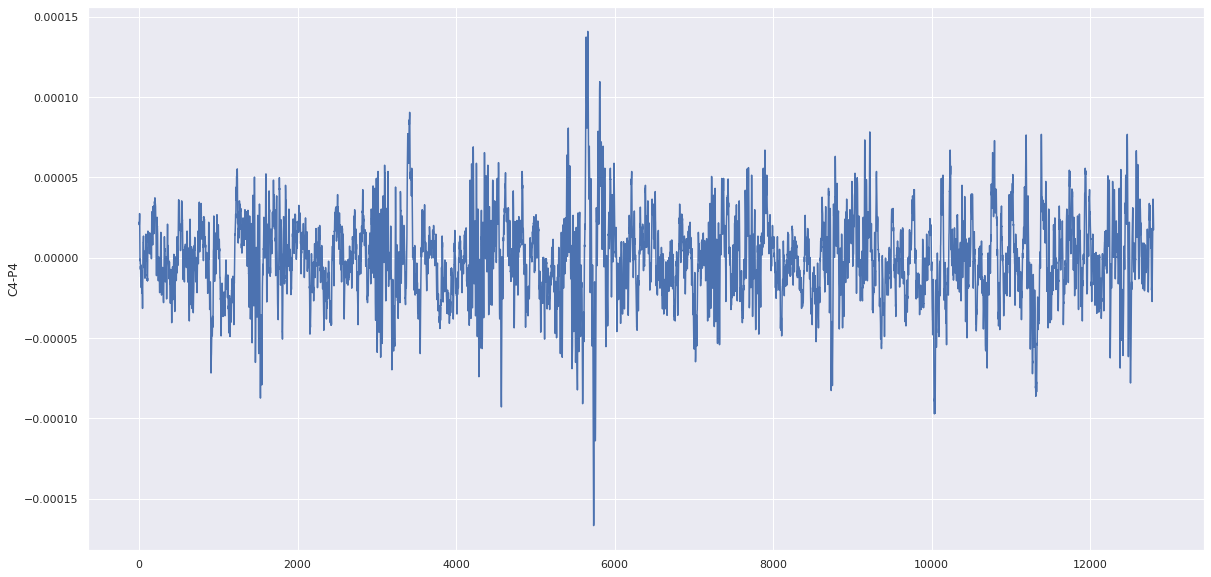

In [12]:
sec = 50
plt.figure(figsize=(20, 10))
sns.lineplot(data=data_df[:256*sec], x=timepoints[:256*sec], y=data_df.iloc[:256*sec,2])

In [13]:
df1 = data_df.sample(frac=1, random_state=666).reset_index(drop=True)

In [14]:
df1[df1['Outcome'] == 0].shape

(1048575, 24)

In [15]:
df1[df1['Outcome'] == 1].shape

(1048575, 24)

In [16]:
y = df1['Outcome']
X = df1.drop(['Outcome'], axis=1)

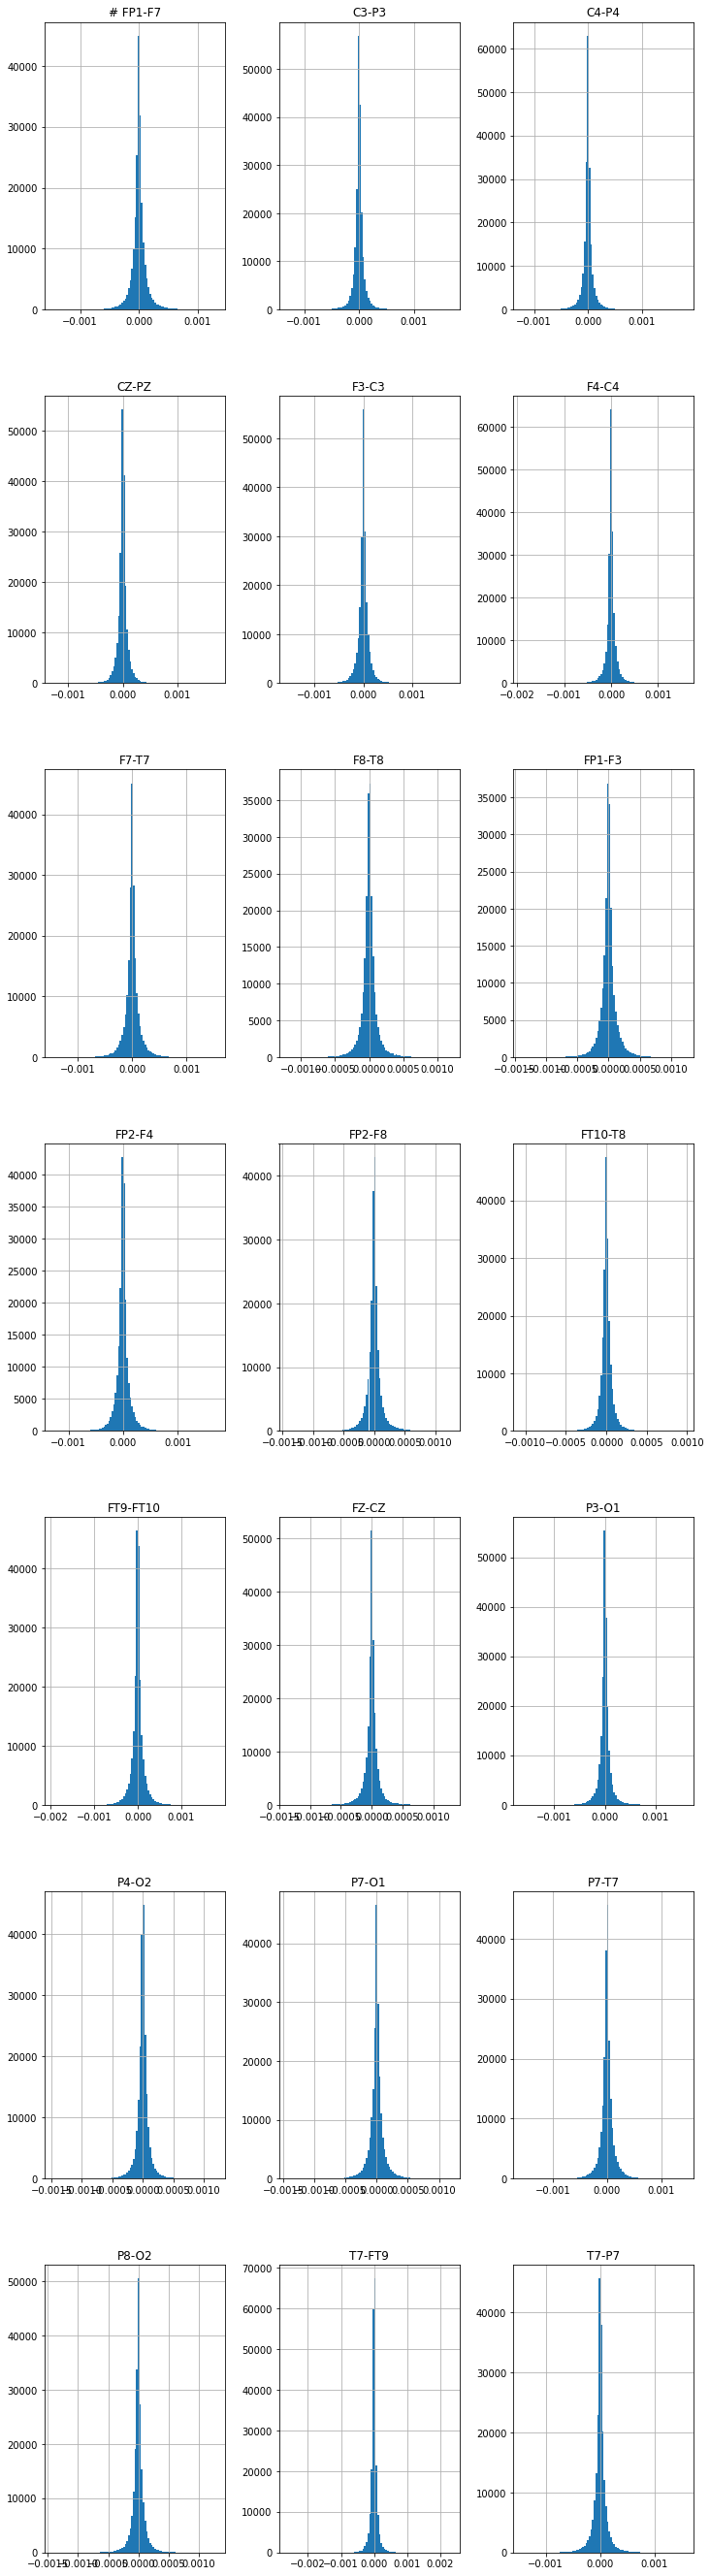

In [ ]:
import matplotlib.pyplot as plt
# Visualize data distribution for each channel

fig, axes = plt.subplots(len(X.columns)//3, 3, figsize=(12, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        X.hist(column = X.columns[i], bins = 100, ax=axis)
        i = i+1

In [17]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=666)

In [22]:
X_val, X_test, y_val, y_test = train_test_split(X_val_test,y_val_test,test_size=0.5, stratify=y_val_test, random_state=666)

In [33]:
X_train.shape, X_val.shape, X_test.shape

((1677720, 23), (209715, 23), (209715, 23))

# **Feature Selection**

Cumulative explained variance with 12 components: 0.9009325129862863


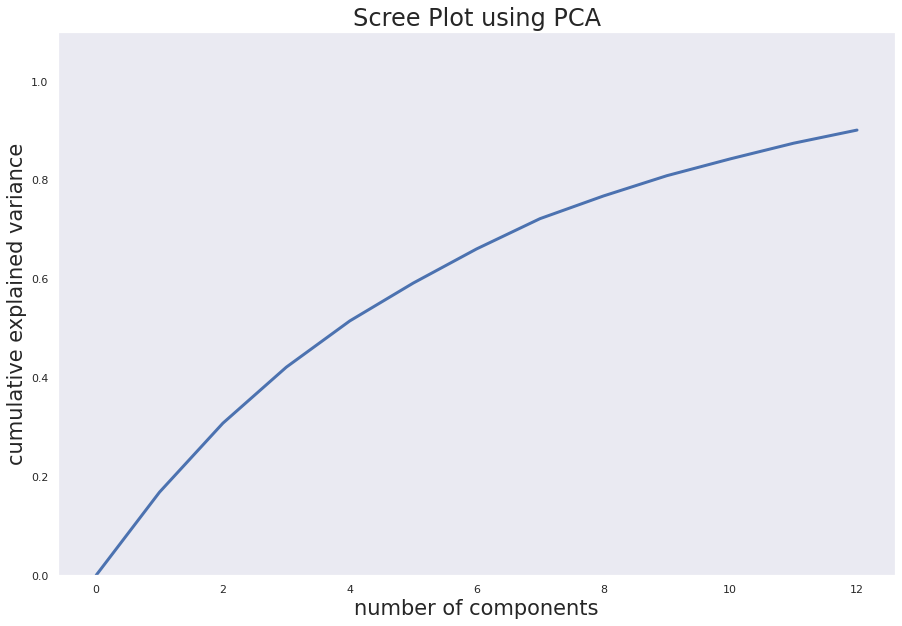

In [43]:
# 1. PCA
from sklearn.decomposition import PCA

n_components = 12
pca = PCA(n_components=n_components)
pca.fit(X_train)

X_train_PCA = pca.transform(X_train)
X_val_PCA = pca.transform(X_val)

X_train_PCA = pd.DataFrame(data = X_train_PCA, columns = [f'PC{i}' for i in range(1, n_components+1)])
X_val_PCA = pd.DataFrame(data = X_val_PCA, columns = [f'PC{i}' for i in range(1, n_components+1)])
cev = np.cumsum(pca.explained_variance_ratio_)
cev = np.insert(cev, 0, 0)
print(f'Cumulative explained variance with {n_components} components: {cev[-1]}')
plt.figure(figsize=(15,10))
plt.ylim(0.0,1.1)
plt.plot(cev, linewidth=3)
plt.xlabel('number of components', fontsize=21)
plt.ylabel('cumulative explained variance', fontsize=21)
plt.title('Scree Plot using PCA', fontsize=24)
plt.rc('font', size=16)
plt.grid()
plt.show()

In [44]:
X_train_PCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-0.000021,-0.000035,0.000005,0.000055,0.000013,0.000003,-0.000016,0.000007,-0.000001,0.000007,0.000027,-0.000019
1,-0.000135,-0.000052,0.000055,0.000029,-0.000066,0.000016,-0.000131,0.000040,0.000029,-0.000079,0.000002,-0.000011
2,-0.000045,-0.000091,0.000167,0.000031,0.000005,0.000002,-0.000186,0.000068,0.000035,-0.000006,-0.000042,-0.000024
3,-0.000272,0.000111,-0.000289,-0.000443,0.000002,0.000012,-0.000454,-0.000399,-0.000032,0.000544,0.000365,0.000258
4,-0.000538,0.000033,0.000354,0.000096,0.000188,-0.000002,-0.000033,0.000120,0.000131,-0.000059,-0.000025,-0.000032
...,...,...,...,...,...,...,...,...,...,...,...,...
1677715,-0.000015,0.000213,0.000003,0.000057,-0.000129,-0.000017,-0.000024,-0.000061,0.000077,0.000111,0.000035,-0.000033
1677716,-0.000019,0.000150,0.000097,0.000119,0.000023,-0.000009,-0.000143,0.000044,-0.000022,0.000011,-0.000006,0.000006
1677717,0.000057,0.000152,0.000282,-0.000127,-0.000121,0.000080,0.000131,-0.000202,0.000027,0.000005,0.000010,0.000060
1677718,-0.000182,-0.000193,-0.000065,0.000068,-0.000053,0.000135,-0.000014,0.000089,-0.000028,0.000038,-0.000055,-0.000040


In [ ]:
from sklearn.svm import SVC
clf = SVC(verbose=1)

In [ ]:
clf.fit(X_train, y_train)

[LibSVM]

SVC(verbose=1)

In [ ]:
clf.score(X_test, y_test)

0.8310325918508452

In [ ]:
import xgboost as xgb

In [ ]:
clf2 = xgb.XGBClassifier()

In [ ]:
clf2.fit(X_train, y_train)

XGBClassifier()

In [ ]:
clf2.score(X_test, y_test)

0.8028514889254464

# **MLP**

In [45]:
from tensorflow.keras import Input, Model, models, layers, losses, metrics, optimizers, callbacks

In [50]:
# baseline model
def create_baseline():
	# create model
  x = Input(shape=(12,))
  l1 = layers.Dense(32, activation='relu')(x)
  l2 = layers.Dense(64, activation='relu')(l1)
  l3 = layers.Dense(32, activation='relu')(l2)
  l4 = layers.Dense(12, activation='relu')(l3) 
  logits = layers.Dense(1, activation='sigmoid')(l4)
  
  model = Model(inputs=x, outputs=logits)
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
  
  return model

model = create_baseline()

In [47]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_10 (Dense)            (None, 32)                416       
                                                                 
 dense_11 (Dense)            (None, 64)                2112      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 14)                462       
                                                                 
 dense_14 (Dense)            (None, 1)                 15        
                                                                 
Total params: 5,085
Trainable params: 5,085
Non-trainable p

In [48]:
callbacks_list = [callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True,), 
                  callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/MLP_EEG.h5', monitor='val_loss', mode='min', save_best_only=True,),
                  ]

In [49]:
history = model.fit(x=X_train_PCA, y=y_train, validation_data=(X_val_PCA, y_val), batch_size=64, epochs=100, verbose=1, callbacks=callbacks_list)

Epoch 1/100
 9678/26215 [==========>...................] - ETA: 49s - loss: 0.6932 - acc: 0.4994

KeyboardInterrupt: ignored